<a href="https://www.kaggle.com/code/aminaromdhani/unsupervised-clustering-dimensionality-reduction?scriptVersionId=100852930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

1. > Unsupervised learning, also known as unsupervised machine learning, uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention. Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition.

![](https://www.researchgate.net/profile/Zhenyu_Wen/publication/336642133/figure/fig3/AS:815304842170368@1571395230317/Examples-of-Supervised-Learning-Linear-Regression-and-Unsupervised-Learning.png)

# Processing 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 29)

In [5]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.drop(['ID','Dt_Customer'],axis=1,inplace=True)

In [8]:
data.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
missing = data["Income"].median()
data["Income"] = data["Income"].fillna(missing)

In [10]:
data.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [12]:
Num=[]
for col in data.columns:
    if (data[col].dtype==int)or (data[col].dtype==float):
        Num.append(col)
print (Num)

['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [13]:
categorical=[]
for col in data.columns:
    if  (data[col].dtype==object):
        categorical.append(col)
print (categorical)

['Education', 'Marital_Status']


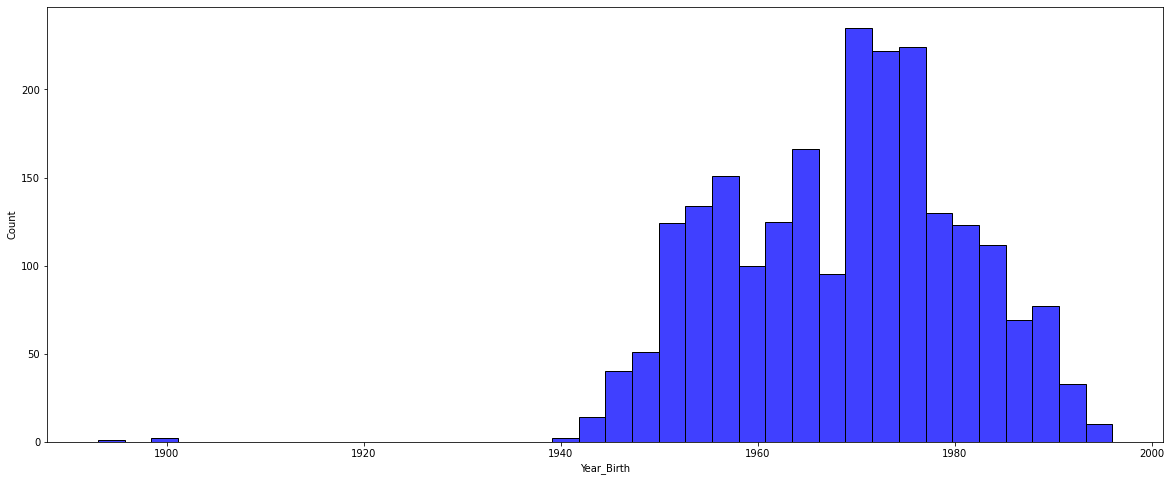

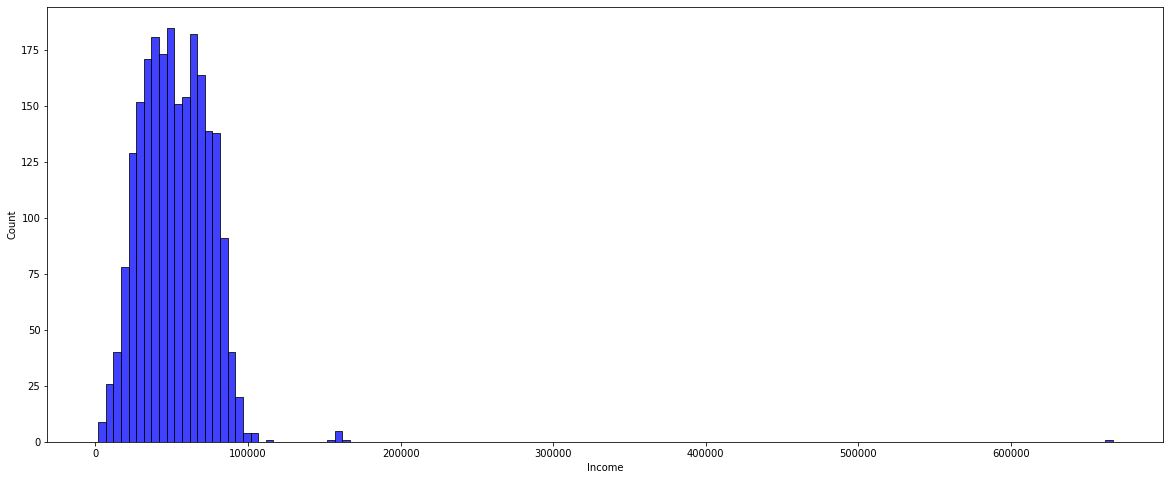

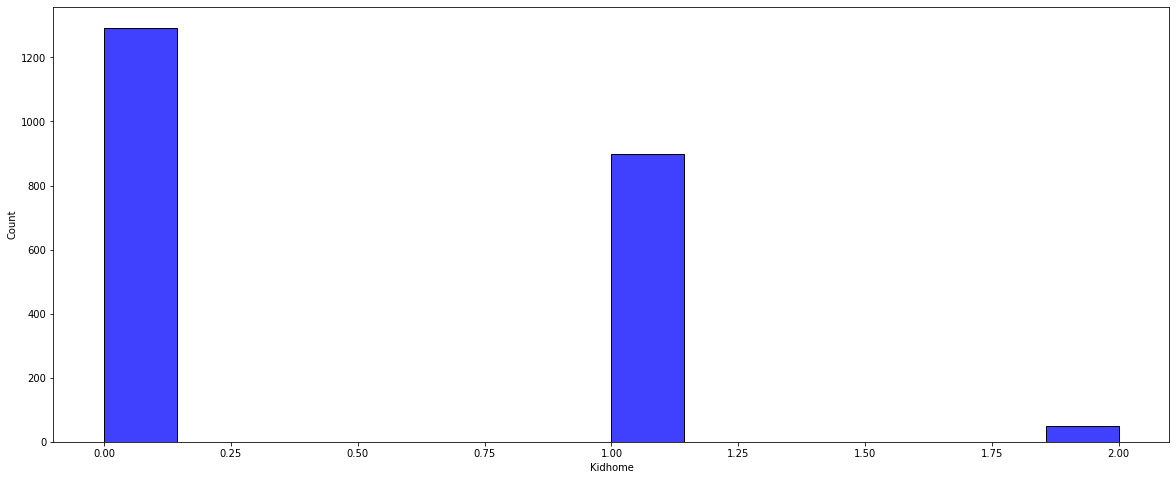

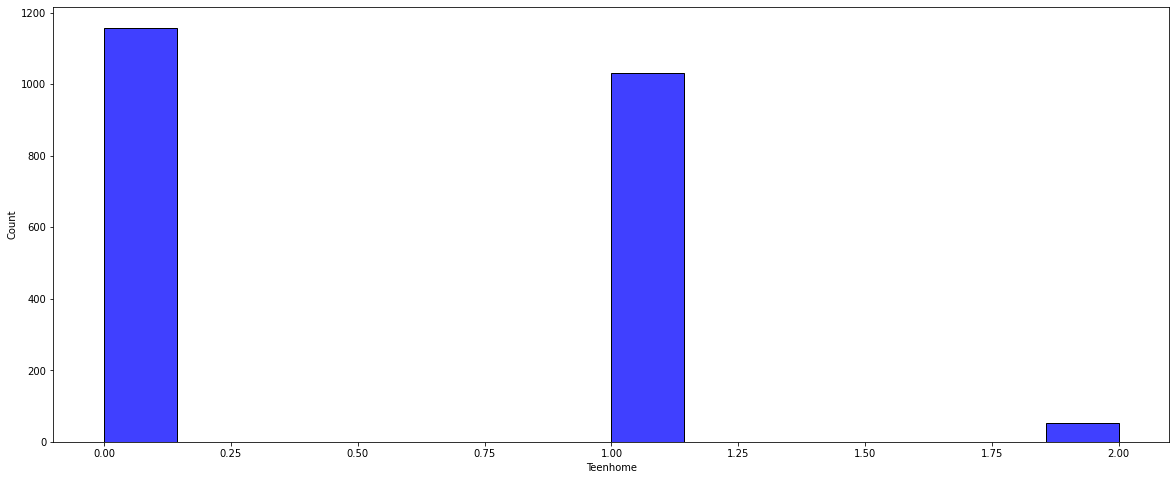

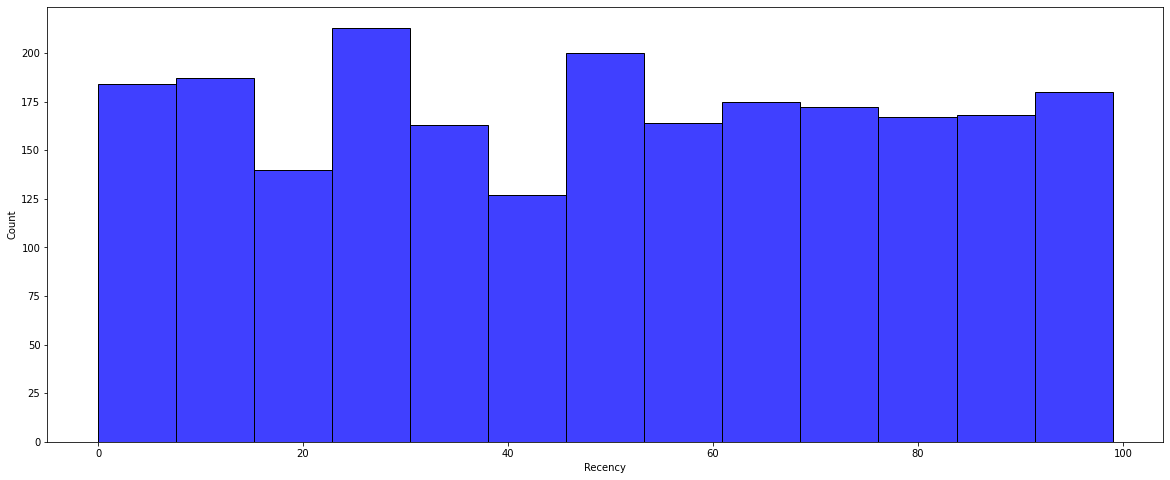

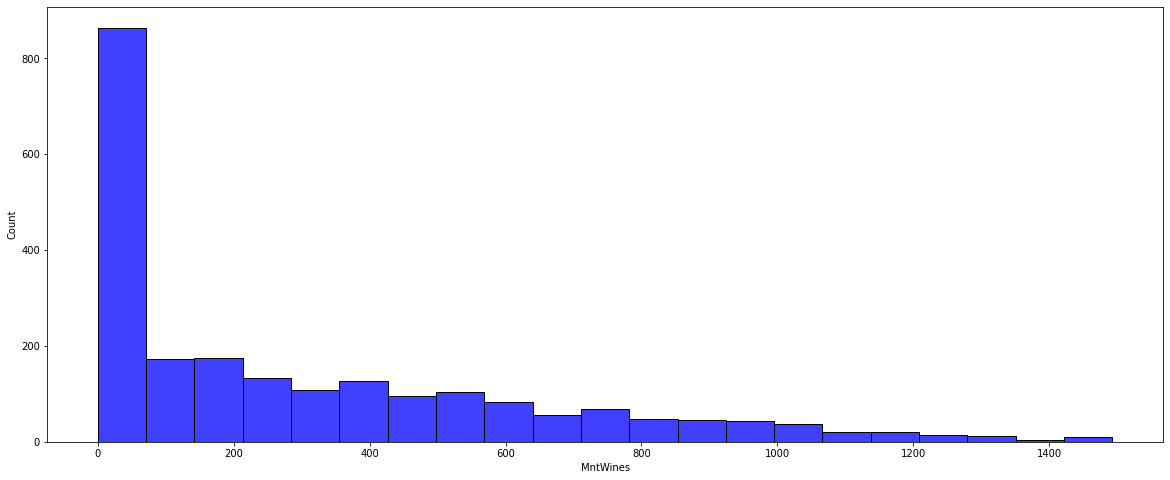

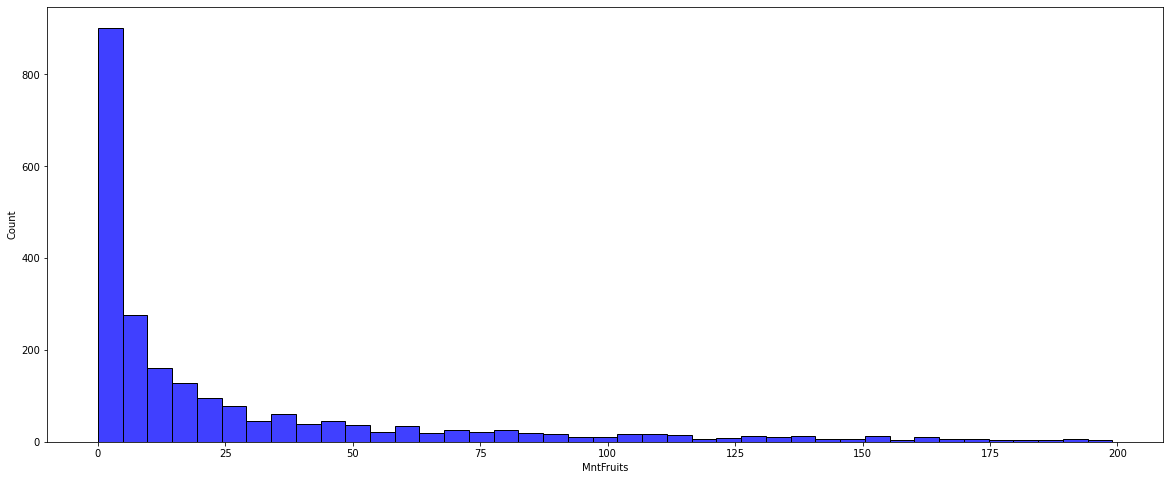

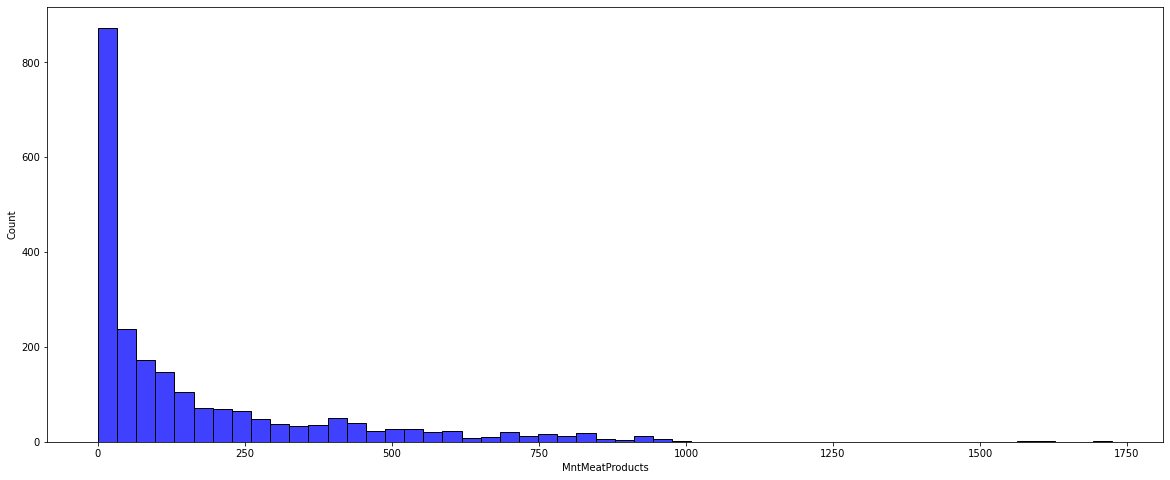

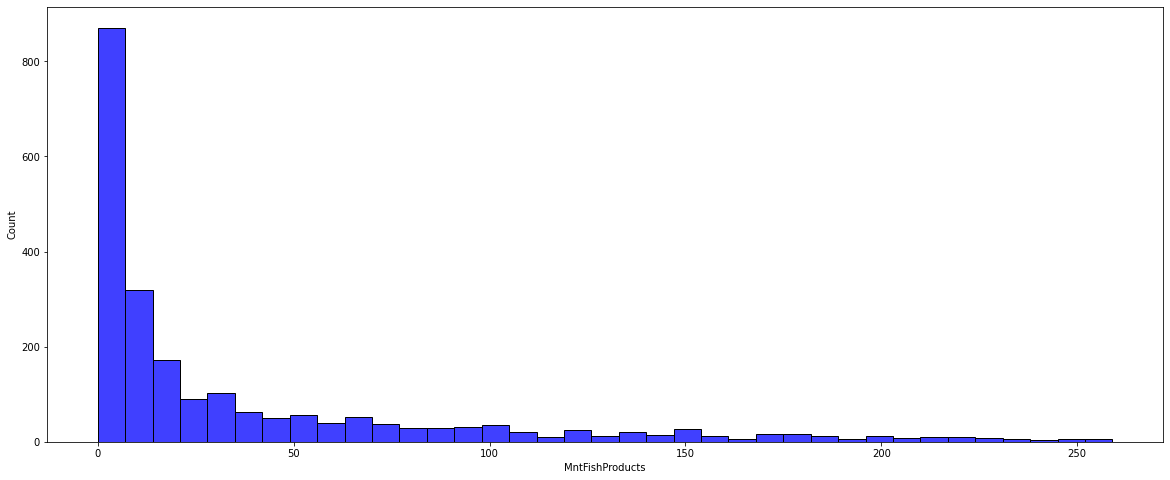

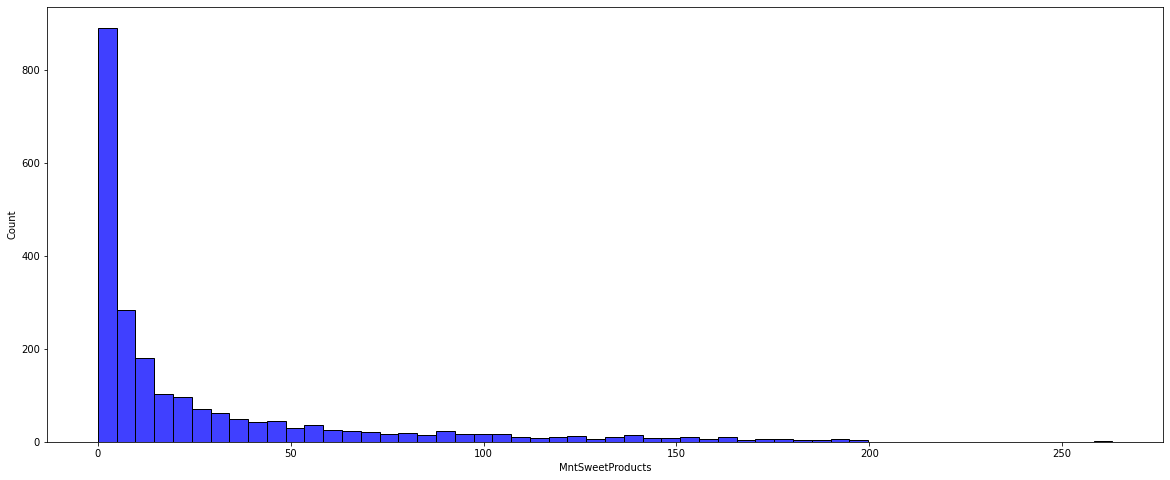

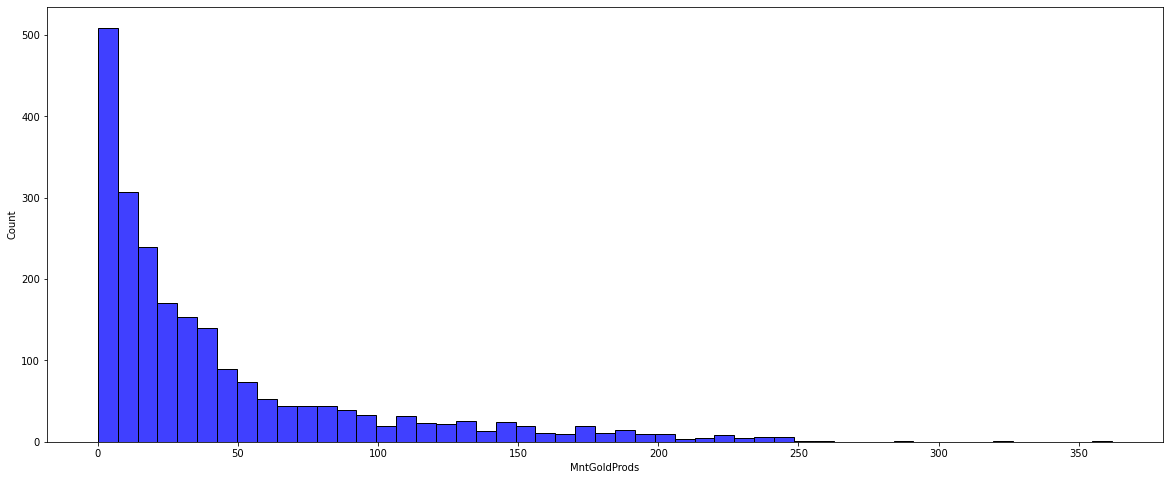

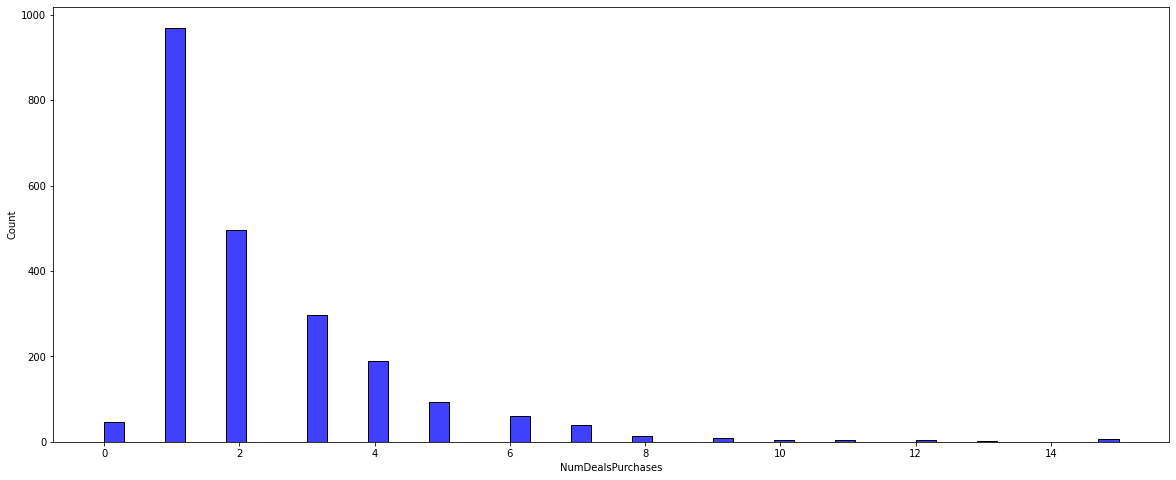

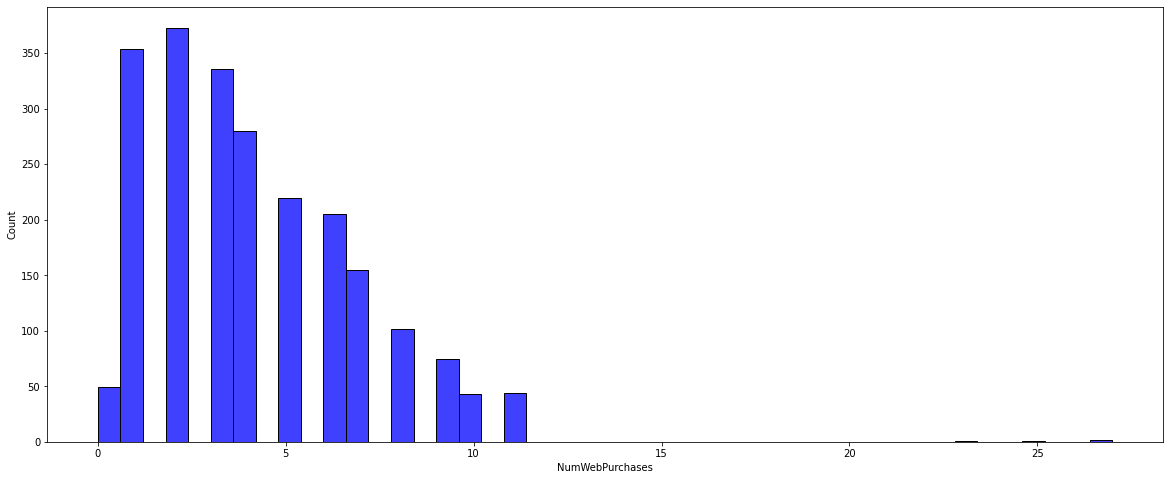

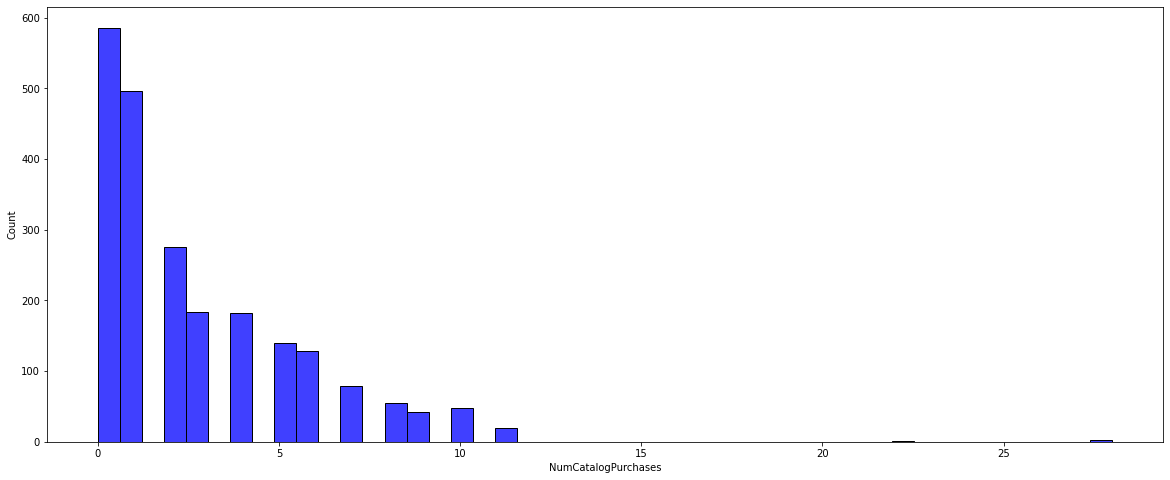

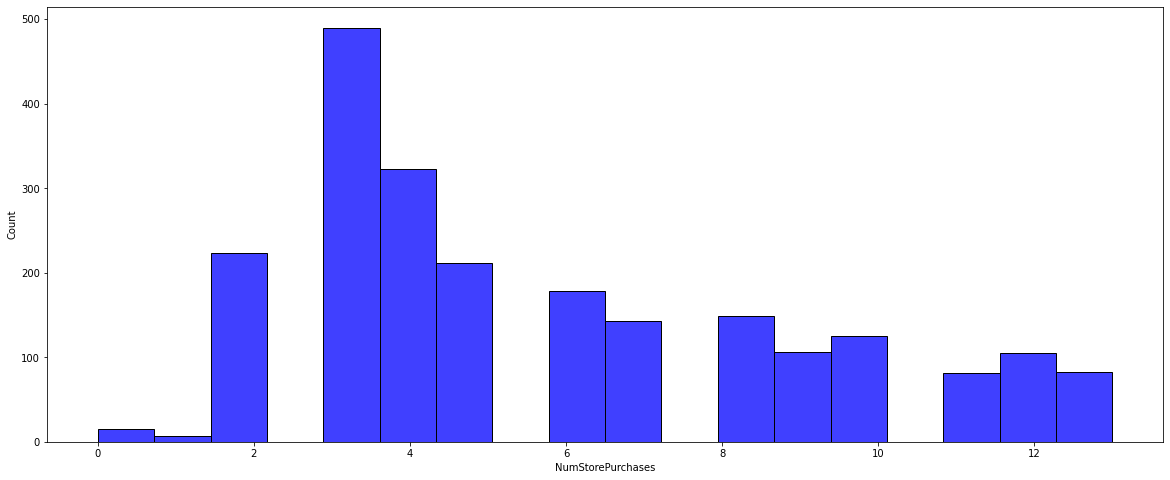

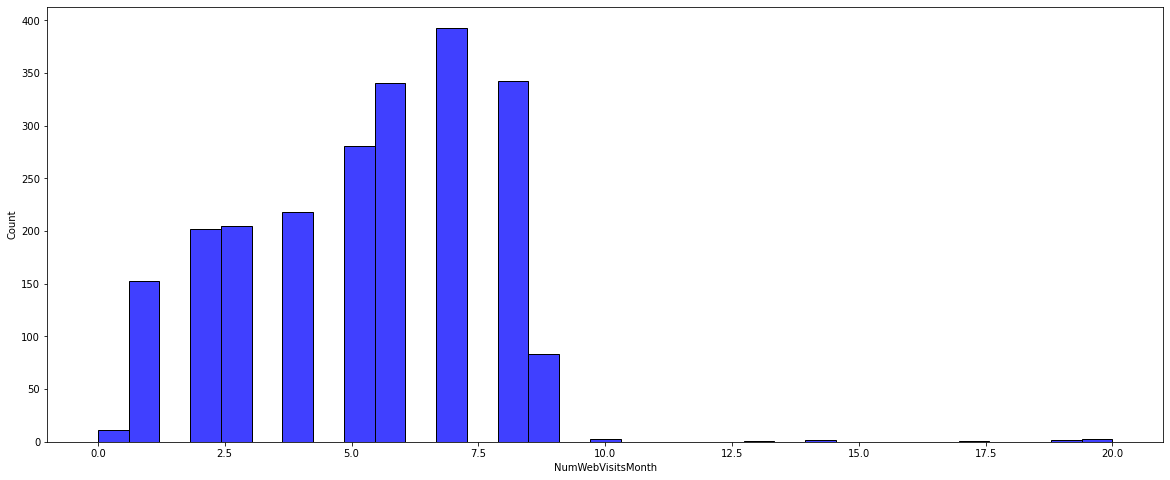

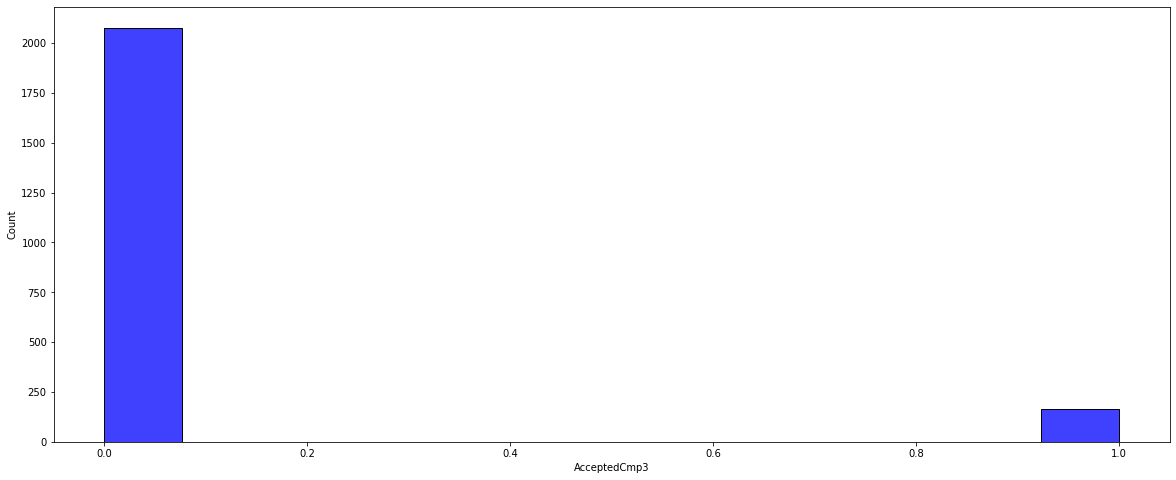

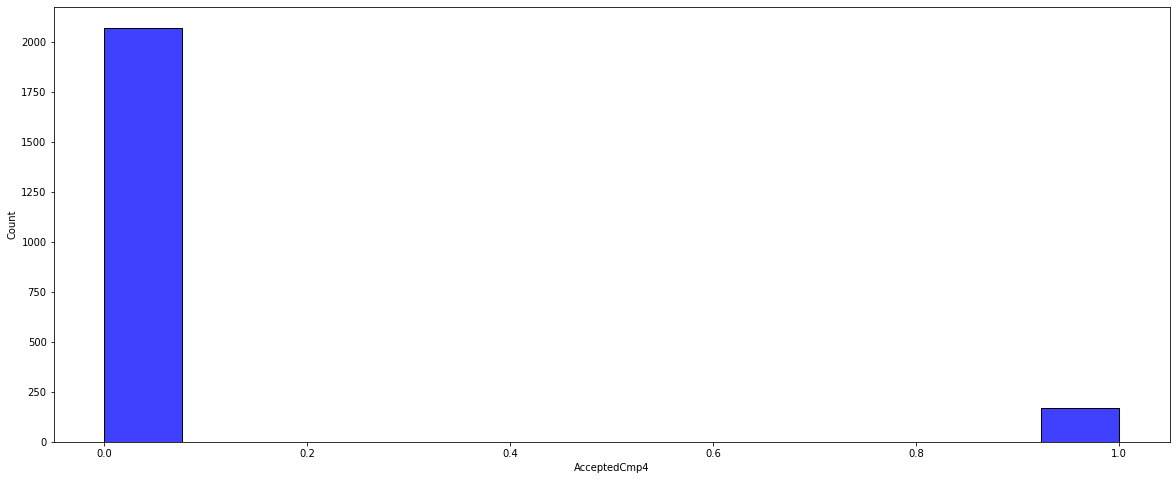

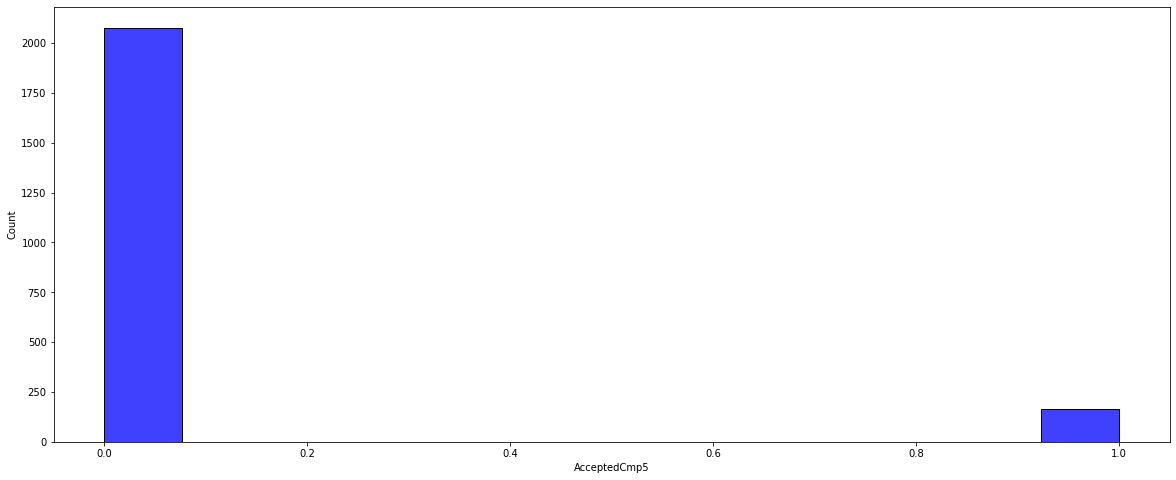

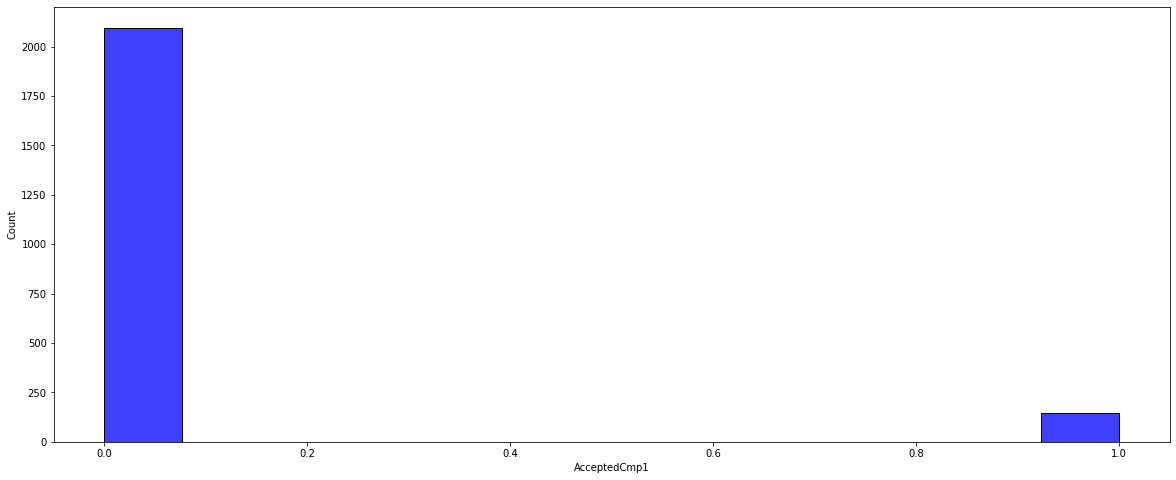

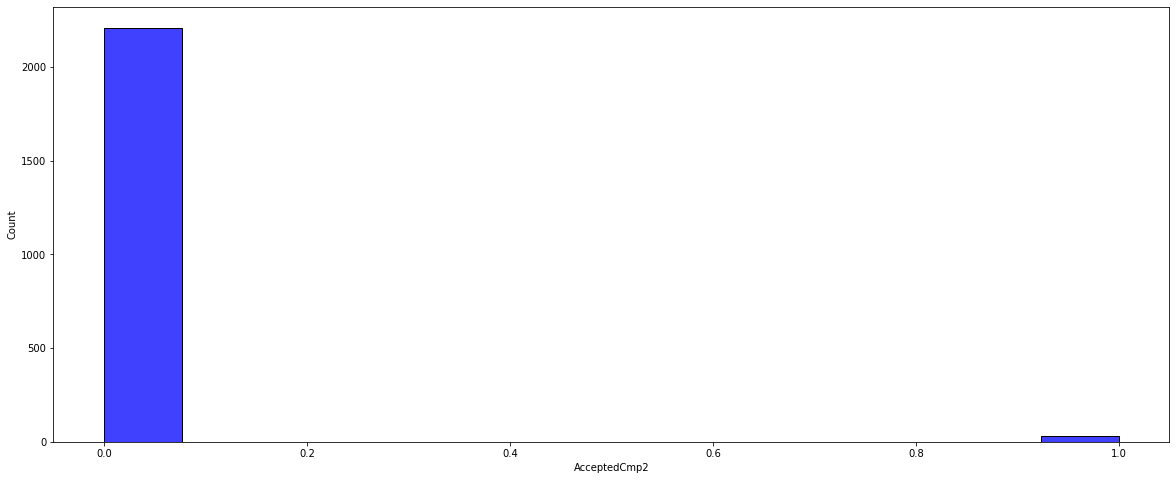

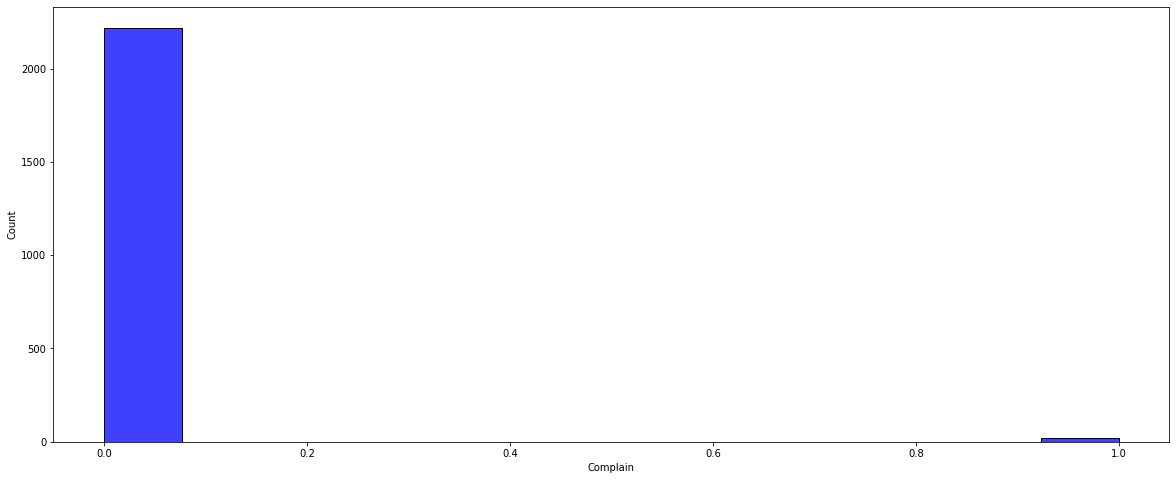

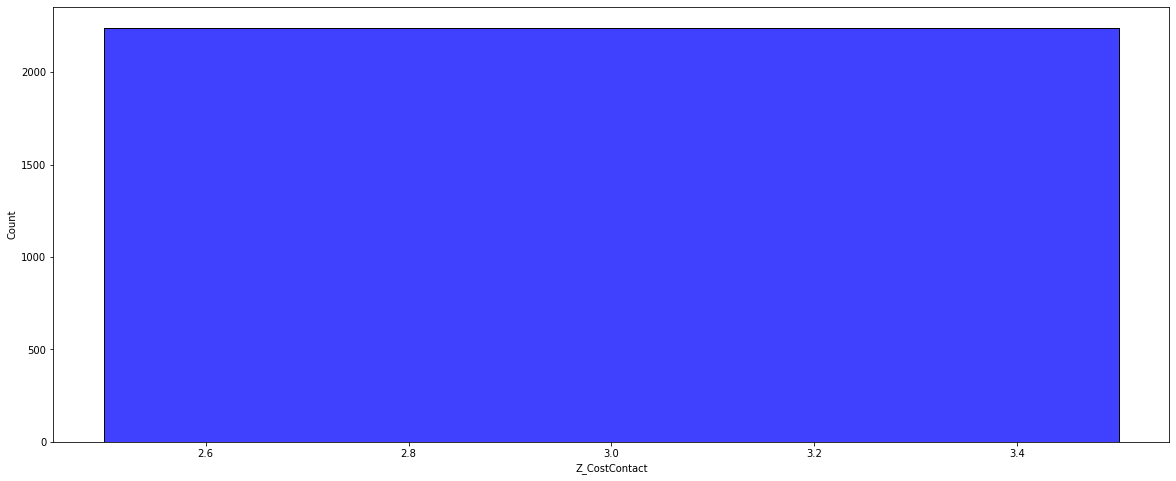

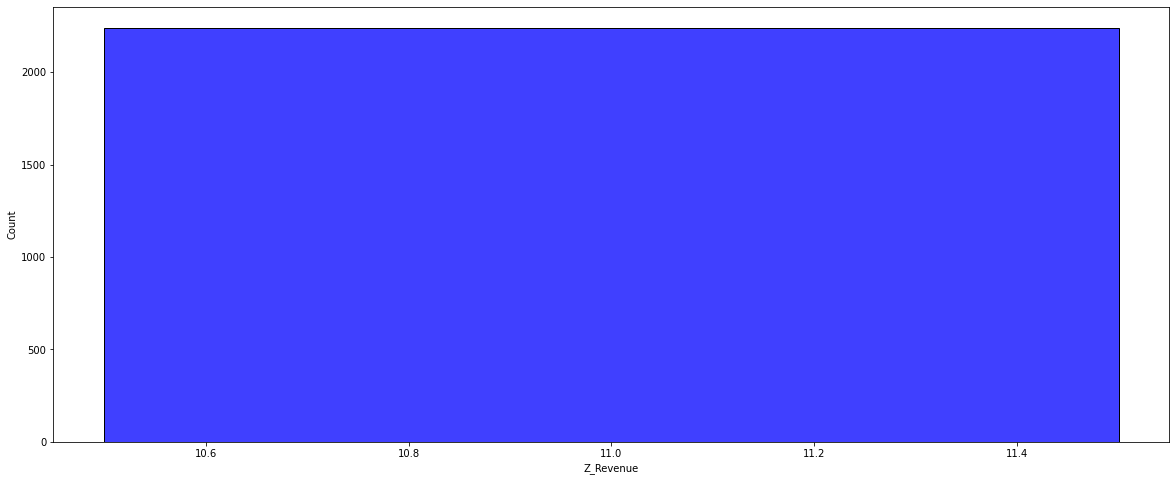

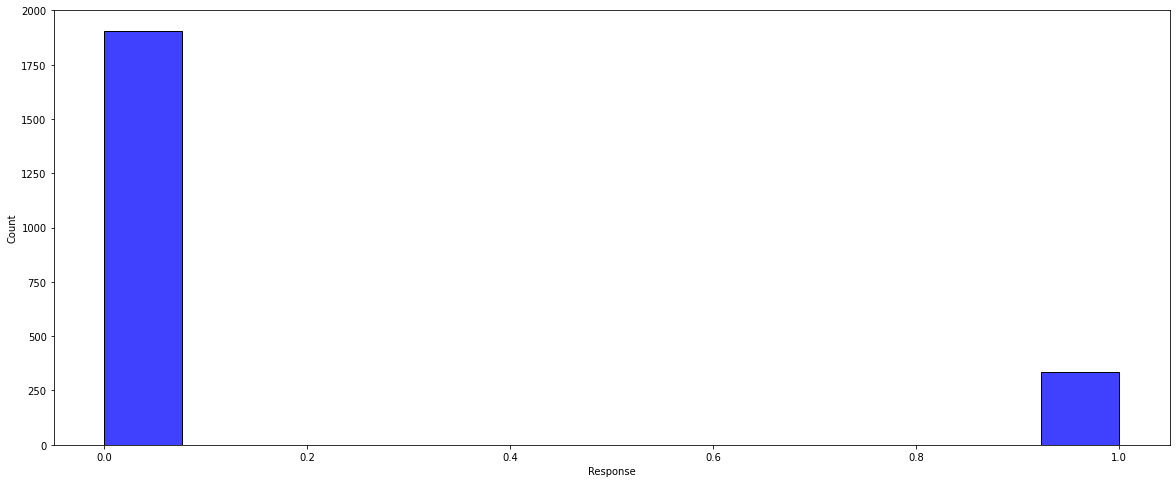

In [14]:
for col in Num:
    plt.figure(figsize=(20,8))
    sns.histplot(data[col], color="b")
    plt.show()

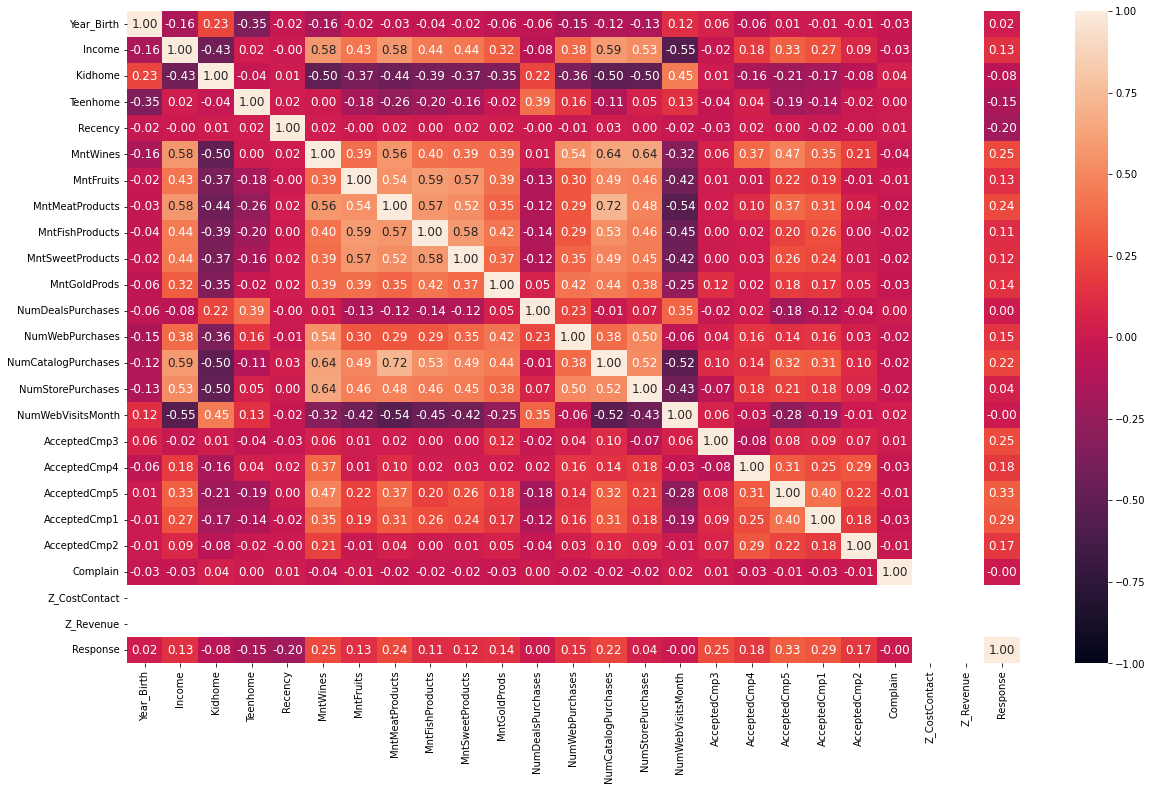

In [15]:
plt.figure(figsize=(20,12))
sns.heatmap(data[Num].corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.show()

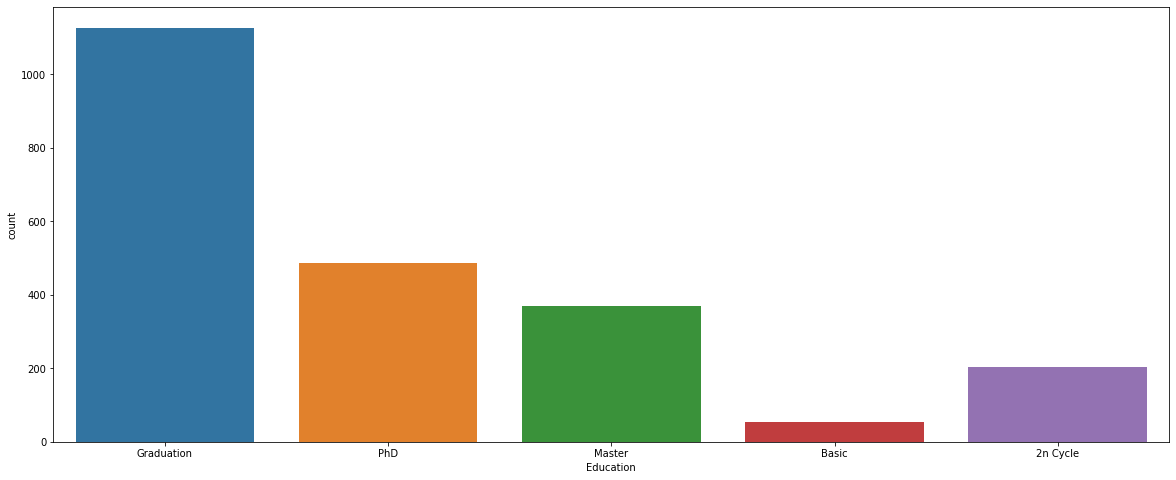

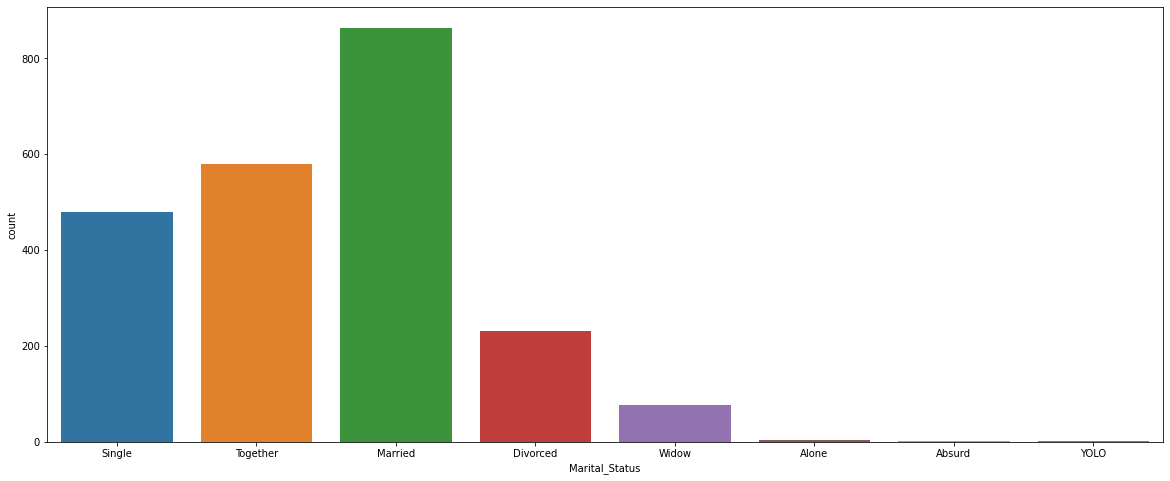

In [16]:
for col in categorical:
    plt.figure(figsize=(20,8))
    sns.countplot(x=data[col])
    plt.show()

In [17]:
categorical

['Education', 'Marital_Status']

In [18]:
from category_encoders import CountEncoder
CE = CountEncoder( cols=['Education', 'Marital_Status'])
data = CE.fit_transform(data)

In [19]:
from sklearn.preprocessing import RobustScaler
RS= RobustScaler()
scale = RS.fit_transform(data)


In [20]:
data = pd.DataFrame(scale, columns=data.columns)

In [21]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.722222,0.000000,-0.260417,0.206299,0.0,0.0,0.18,0.960458,2.50000,2.217593,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.888889,0.000000,-0.260417,-0.153812,1.0,1.0,-0.22,-0.338189,-0.21875,-0.282407,...,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.277778,0.000000,0.000000,0.617737,0.0,0.0,-0.46,0.525494,1.28125,0.277778,...,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.777778,0.000000,0.000000,-0.755259,1.0,0.0,-0.46,-0.338189,-0.12500,-0.217593,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.611111,-0.846764,0.739583,0.211032,1.0,0.0,0.90,-0.001041,1.09375,0.236111,...,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.166667,0.000000,0.739583,0.300495,0.0,1.0,-0.06,1.114464,1.09375,0.532407,...,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2236,-1.333333,-0.846764,0.000000,0.385713,2.0,1.0,0.14,0.483871,-0.25000,-0.171296,...,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2237,0.611111,0.000000,-0.906250,0.170972,0.0,0.0,0.84,1.528616,1.25000,0.694444,...,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2238,-0.777778,-1.000000,0.000000,0.545434,0.0,1.0,-0.82,0.529657,0.68750,0.680556,...,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
data.shape

(2240, 27)

# Dimensionality Reduction

# PCA

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data)

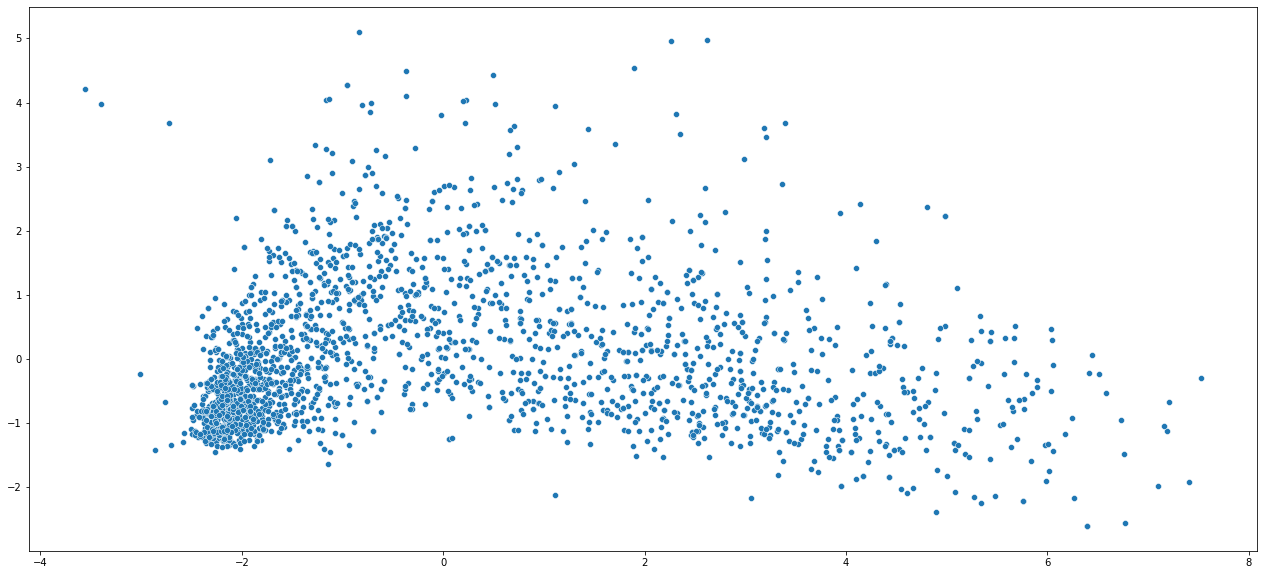

In [24]:
plt.figure(figsize=(22,10))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1])
plt.show()


# TSNE

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_data = tsne.fit_transform(data)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


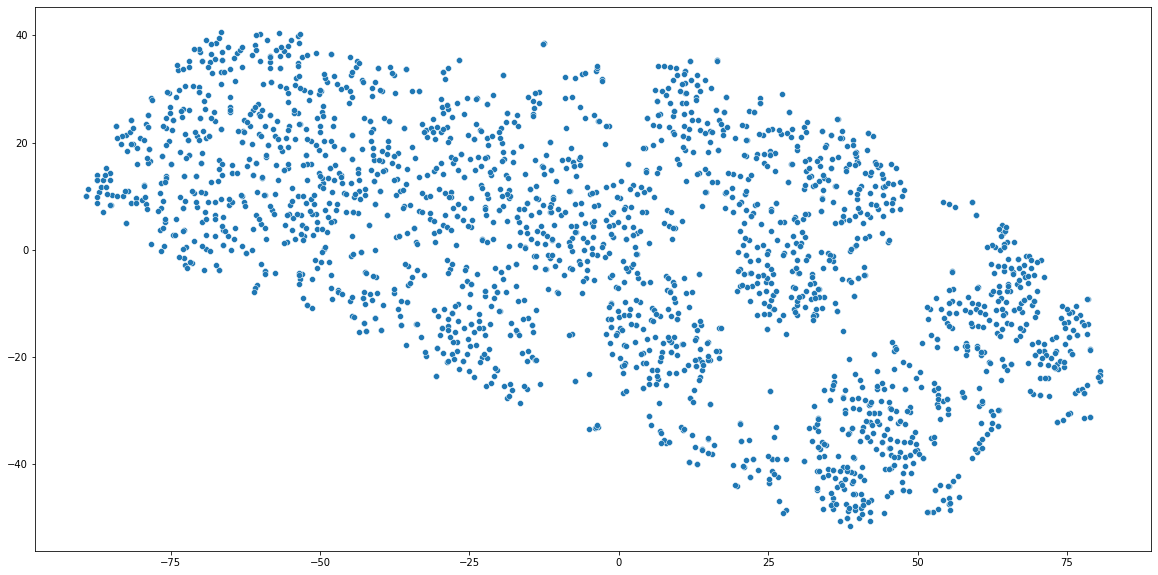

In [26]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1])
plt.show()

# UMAP

In [27]:
from umap import UMAP
umap = UMAP()
umap_data = umap.fit_transform(data)

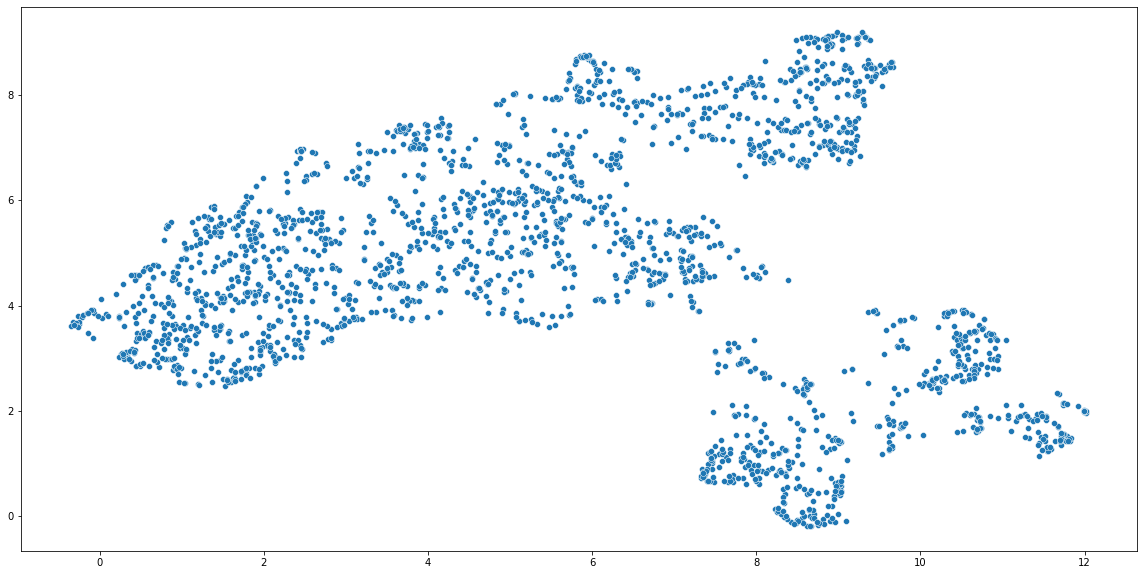

In [28]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=umap_data[:,0], y=umap_data[:,1])
plt.show()

# Clustering

1. > Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them. 

![](https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg)

 > It is not necessary for clusters to be spherical. Such as : 

![](https://media.geeksforgeeks.org/wp-content/uploads/clusteringg.jpg)

#  Overview of clustering methods

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)
 > # A comparison of the clustering algorithms in scikit-learn

1. # K-means

The k-means algorithm divides a set of  samples  into  disjoint clusters , each described by the mean  of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from , although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [29]:
from sklearn.cluster import KMeans


In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
cluster_labels = kmeans.predict(data)

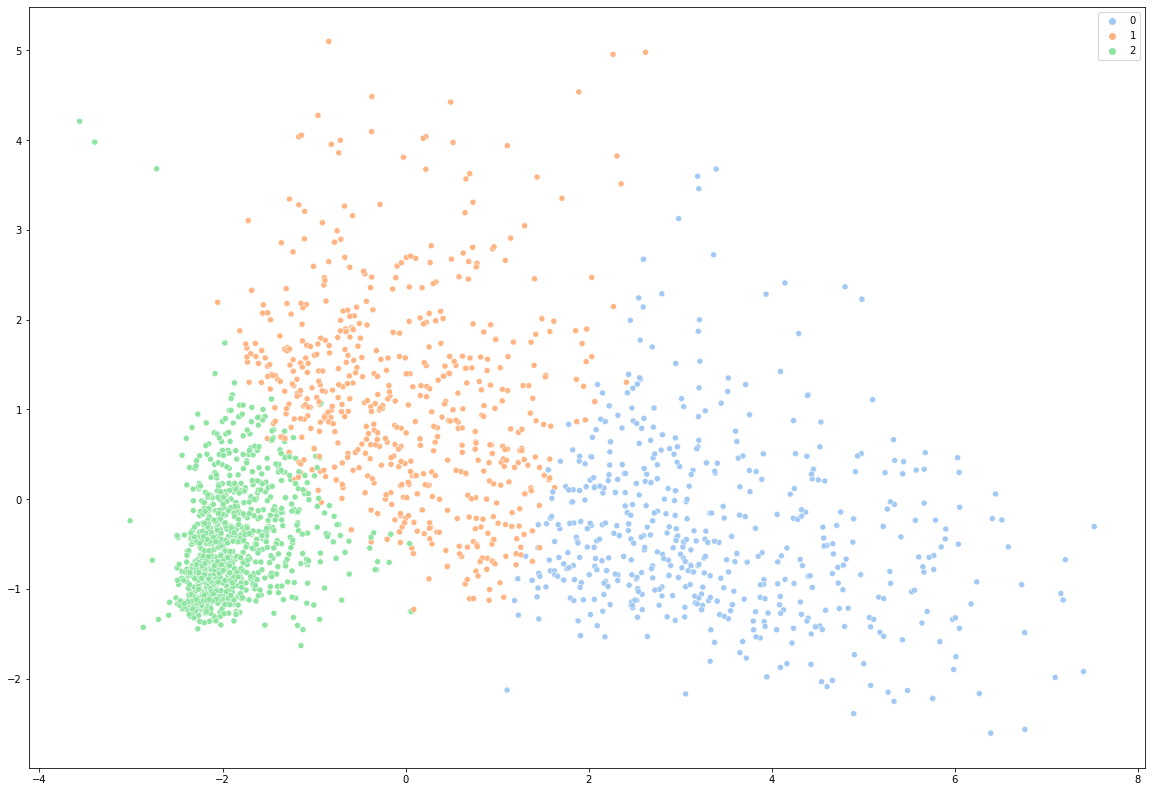

In [31]:
plt.figure(figsize=(20,14))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=cluster_labels, palette="pastel")
plt.show()

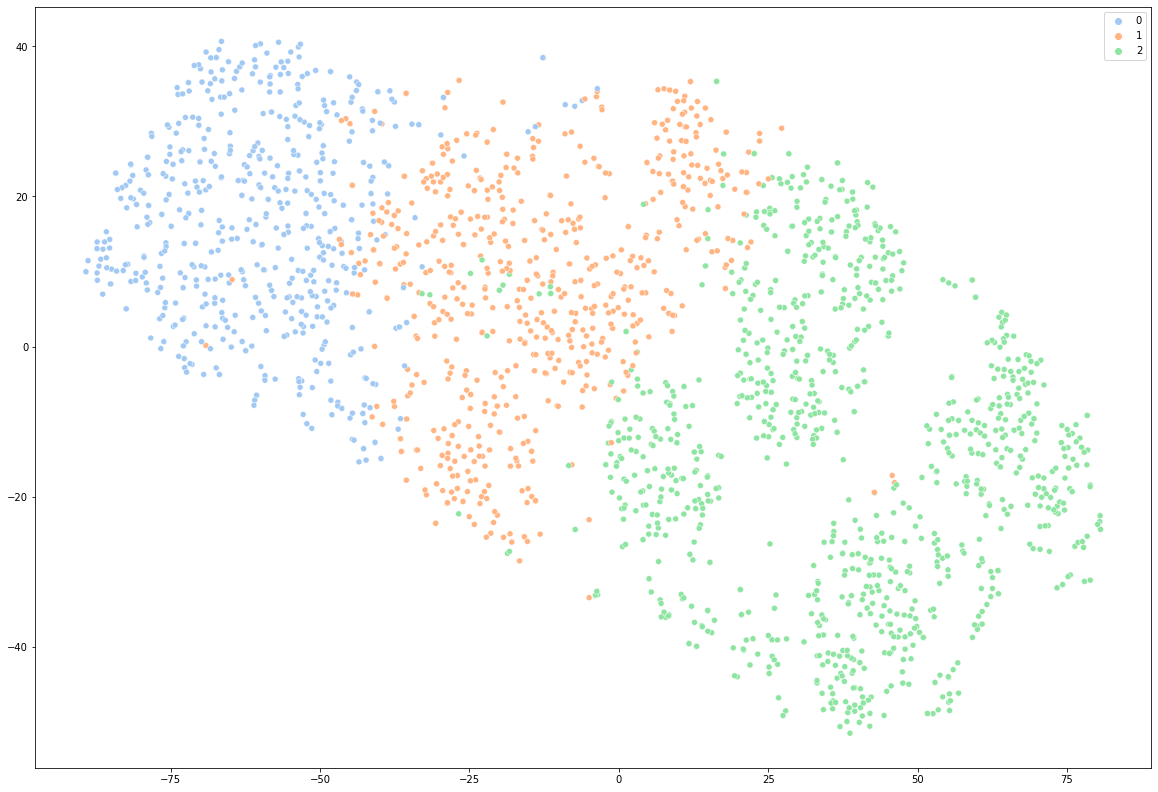

In [32]:
plt.figure(figsize=(20,14))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=cluster_labels, palette="pastel")
plt.show()

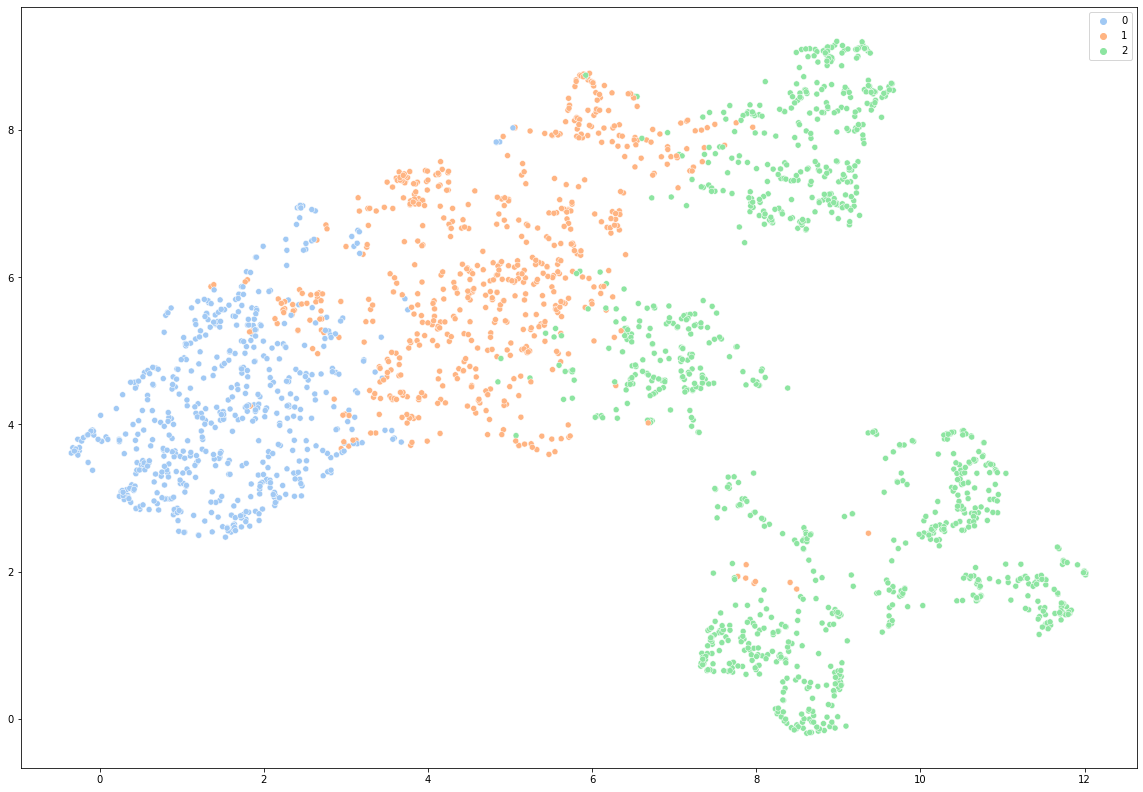

In [33]:
plt.figure(figsize=(20,14))
sns.scatterplot(x=umap_data[:,0], y=umap_data[:,1], hue=cluster_labels, palette="pastel")
plt.show()

# DBSCAN

1. > The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
dbscan = DBSCAN(eps=0.5, min_samples=40).fit(umap_data)

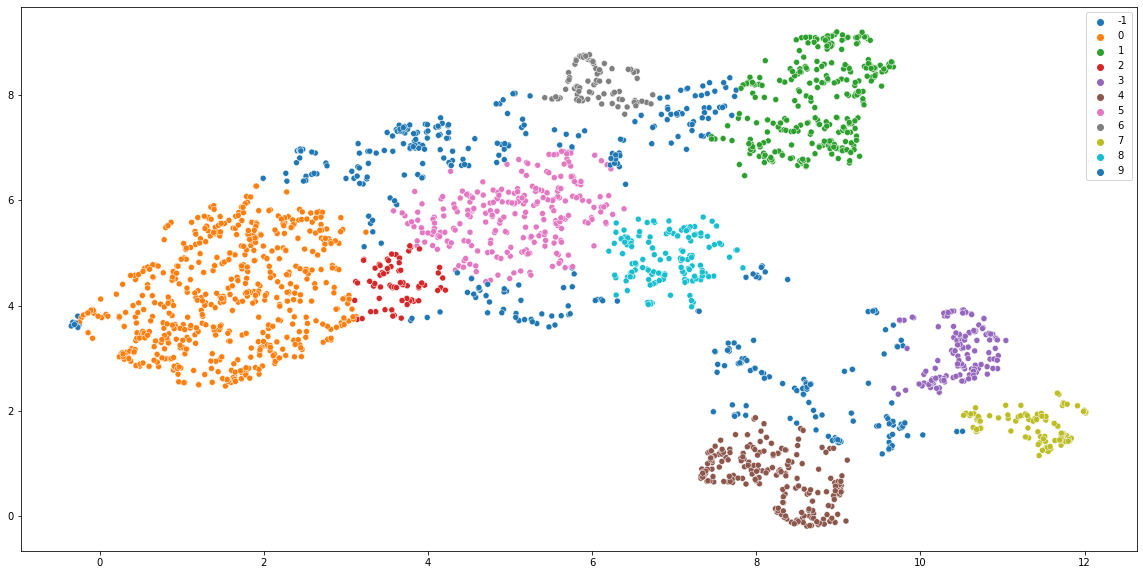

In [36]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=umap_data[:,0], y=umap_data[:,1], hue=dbscan.labels_, palette="tab10")
plt.show()